In [12]:
#Question No. 1 & Dataset:- glass.csv
#Implement a KNN model to classify the glass
from pandas import read_csv
import numpy as np
#For cross-validation for validating the model[KFold]
from sklearn.model_selection import KFold
#For find out accuracy on different folds[cross_val_score]
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [13]:
#Read the file 
filename = 'glass.csv'
names = [
    'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe','Type'
]
dataframe = read_csv(filename, names=names, header=0)
array = dataframe.values
X = array[:, 0:9]
Y = array[:, 9]

In [14]:
#No. of subsamples= num_folds= 10
num_folds = 10
kfold = KFold(n_splits=10)

In [15]:
#Choose the no. of neighbors= n_neighbors= 17
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, X, Y, cv=kfold)

In [16]:
print(results.mean())

0.43311688311688296


### Grid Search for Algorithm Tuning

In [17]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
filename = 'glass.csv'
names = [
    'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe','Type'
]
dataframe = read_csv(filename, names=names,header=0)
array = dataframe.values
X = array[:, 0:9]
Y = array[:, 9]

In [19]:
#Try out for all the k-values starting from[ 1 to 40] & then give the best set of k-values
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [20]:
#Best set of k-values by applying [GridSearchcv] function
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [21]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


### Visualizing the CV results

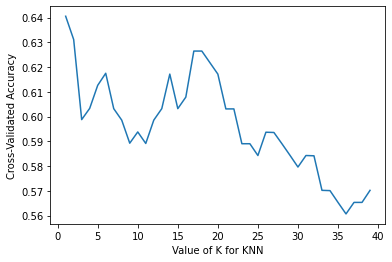

In [22]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 40
k_range = range(1, 40)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()